In [63]:
import sqlite3
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
from IPython.display import display, HTML
import pickle as pkl

In [21]:
db_file = "./data/database.sqlite"
try:
    conn = sqlite3.connect(db_file)
except Exception as e:
    print(e)

In [22]:
cur  = conn.cursor()
tables = cur.execute("SELECT name FROM sqlite_master WHERE type='table'")
# conn.tables

In [23]:
# tables.fetchall()

[(u'sqlite_sequence',),
 (u'Player_Attributes',),
 (u'Player',),
 (u'Match',),
 (u'League',),
 (u'Country',),
 (u'Team',),
 (u'Team_Attributes',)]

In [24]:
players = pd.read_sql_query("SELECT * from Player", conn)
match = pd.read_sql_query("SELECT * from Match",conn)
league = pd.read_sql_query("SELECT * from League",conn)
team = pd.read_sql_query("SELECT * from Team",conn)
player_attr = pd.read_sql_query("SELECT * from Player_Attributes",conn)
team_attr = pd.read_sql_query("SELECT * from Team_Attributes",conn)

In [80]:
num_matches = g.merge(league,left_on='league_id',right_on='id')
num_matches['no_of_matches'] = num_matches['count']
num_matches = num_matches[['name', 'no_of_matches']]

In [82]:
num_matches

,name,no_of_matches
0,Belgium Jupiler League,1728
1,England Premier League,3040
2,France Ligue 1,3040
3,Germany 1. Bundesliga,2448
4,Italy Serie A,3017
5,Netherlands Eredivisie,2448
6,Poland Ekstraklasa,1920
7,Portugal Liga ZON Sagres,2052
8,Scotland Premier League,1824
9,Spain LIGA BBVA,3040


In [99]:
barca = team_attr.iloc[123]
barca = barca.drop(['id','team_fifa_api_id','team_api_id','date'])
barca = pd.DataFrame(barca)

In [103]:
# barca.to_html()

<table border="1" class="dataframe">  <thead>    <tr style="text-align: right;">      <th></th>      <th>FC Barcelona</th>    </tr>  </thead>  <tbody>    <tr>      <th>buildUpPlaySpeed</th>      <td>36</td>    </tr>    <tr>      <th>buildUpPlaySpeedClass</th>      <td>Balanced</td>    </tr>    <tr>      <th>buildUpPlayDribbling</th>      <td>35</td>    </tr>    <tr>      <th>buildUpPlayDribblingClass</th>      <td>Normal</td>    </tr>    <tr>      <th>buildUpPlayPassing</th>      <td>51</td>    </tr>    <tr>      <th>buildUpPlayPassingClass</th>      <td>Mixed</td>    </tr>    <tr>      <th>buildUpPlayPositioningClass</th>      <td>Free Form</td>    </tr>    <tr>      <th>chanceCreationPassing</th>      <td>36</td>    </tr>    <tr>      <th>chanceCreationPassingClass</th>      <td>Normal</td>    </tr>    <tr>      <th>chanceCreationCrossing</th>      <td>49</td>    </tr>    <tr>      <th>chanceCreationCrossingClass</th>      <td>Normal</td>    </tr>    <tr>      <th>chanceCreationShooting</th>      <td>56</td>    </tr>    <tr>      <th>chanceCreationShootingClass</th>      <td>Normal</td>    </tr>    <tr>      <th>chanceCreationPositioningClass</th>      <td>Free Form</td>    </tr>    <tr>      <th>defencePressure</th>      <td>61</td>    </tr>    <tr>      <th>defencePressureClass</th>      <td>Medium</td>    </tr>    <tr>      <th>defenceAggression</th>      <td>65</td>    </tr>    <tr>      <th>defenceAggressionClass</th>      <td>Press</td>    </tr>    <tr>      <th>defenceTeamWidth</th>      <td>65</td>    </tr>    <tr>      <th>defenceTeamWidthClass</th>      <td>Normal</td>    </tr>    <tr>      <th>defenceDefenderLineClass</th>      <td>Cover</td>    </tr>  </tbody></table>

In [27]:
players[players['player_name'] == 'Lionel Messi']

,id,player_api_id,player_name,player_fifa_api_id,birthday,height,weight
6169,6176,30981,Lionel Messi,158023,1987-06-24 00:00:00,170.18,159


In [34]:
# player_attr[player_attr['player_api_id'] == 30981]
messi = player_attr.iloc[102482].drop(['id','player_fifa_api_id','player_api_id','date','preferred_foot','attacking_work_rate',
                              'defensive_work_rate'])

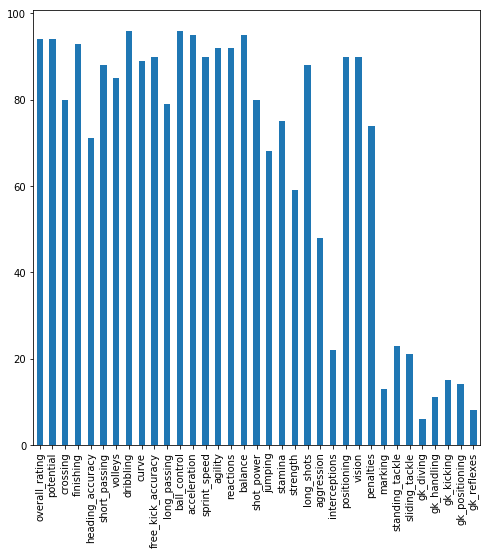

In [107]:
messi.plot(kind='bar',figsize=(8,8))
plt.savefig('messi.png',bbox_inches='tight')
plt.show()

In [75]:
match.shape

(25979, 115)

In [62]:
g = match.groupby('league_id').count()
g['count'] = g['id']
g = pd.DataFrame(g['count'])

In [87]:
# league

In [70]:
g['league_id'] = g.index

In [86]:
keys = match.keys()
for k in keys:
#     print k

IndentationError: expected an indented block (<ipython-input-86-69e6230dec3d>, line 3)

# Data Preprocessing

In [124]:
def match_names(team_name):
    return team_name[:-3].strip()

def get_year(date):
    date = pd.to_datetime(date)
    return date.year


In [77]:
event_data = pd.read_csv("./data/event_data.csv")
line_up = pd.read_csv("./data/lineup.csv")
match_data = pd.read_csv("./data/match_data.csv")

match_data['date'] = pd.to_datetime(match_data['date'],format='%m/%d/%y') 

match_data['match_id'] = match_data['temp_id']
match_data.drop('temp_id',axis=1,inplace=True)
event_data['match_id'] = event_data['join_id']
event_data.drop('join_id',axis=1,inplace=True)

In [78]:
match_data.head()

,id,week,home,away,date,winner,score,match_id
0,1,1,Newcastle United FC,Liverpool FC,2014-11-01,1,1 - 0,1510566212502
1,2,1,Arsenal FC,Burnley FC,2014-11-01,1,3 - 0,1510566215494
2,3,1,Chelsea FC,Queens Park Rangers FC,2014-11-01,1,2 - 1,1510566218594
3,4,1,Everton FC,Swansea City A FC,2014-11-01,0,0 - 0,1510566221312
4,5,1,Hull City AFC,Southampton FC,2014-11-01,-1,0 - 1,1510566224838


In [79]:
event_data.head()

,id,minute,player_name,event_type,event_datacol,match_id
0,1,79',J. Colback,Yellow Card,H,1510566212502
1,2,73',Ayoze Pérez,Goal,H,1510566212502
2,3,66',R. Cabella,Sammy Ameobi,H,1510566212502
3,4,62',D. Janmaat,Yellow Card,H,1510566212502
4,5,49',M. Sissoko,Yellow Card,H,1510566212502


In [80]:
# line_up.head()

In [81]:
match_data.head()

,id,week,home,away,date,winner,score,match_id
0,1,1,Newcastle United FC,Liverpool FC,2014-11-01,1,1 - 0,1510566212502
1,2,1,Arsenal FC,Burnley FC,2014-11-01,1,3 - 0,1510566215494
2,3,1,Chelsea FC,Queens Park Rangers FC,2014-11-01,1,2 - 1,1510566218594
3,4,1,Everton FC,Swansea City A FC,2014-11-01,0,0 - 0,1510566221312
4,5,1,Hull City AFC,Southampton FC,2014-11-01,-1,0 - 1,1510566224838


In [82]:
minutes = pd.DataFrame(range(91),columns=['minute'])
match_data['dump'] = [1 for i in range(match_data.shape[0])]
minutes['dump'] = [1 for i in range(minutes.shape[0])]

match_data = pd.merge(match_data,minutes).drop('dump',axis=1)

In [83]:
event_data.dropna(inplace=True,axis=0, how= 'any')
event_data.minute = event_data.minute.astype("str")
for i,row in event_data.iterrows():
    if "+" in event_data.loc[i,('minute')]:
        event_data.loc[i,('minute')] = event_data.loc[i,('minute')][:2]
    else:
        event_data.loc[i,('minute')] = event_data.loc[i,('minute')][:-1]

event_data.minute = event_data.minute.astype("int")
event_data.sort_values(["match_id",'minute'],inplace=True)
event_data.dropna(axis=0,how='any',inplace=True)

In [73]:
# match_data['join_id'] = str(match_data['match_id'])+str(match_data['minute'])
# event_data['join_id'] = str(event_data['match_id'])+str(event_data['minute'])

# event_data.drop_duplicates(subset=["match_id", "minute"], keep='first', inplace=True)
# event_data.head(10)

In [74]:
# match_data.head(20)

In [84]:
minute_data = pd.merge(match_data,event_data,on=["match_id", "minute"],how='left',sort=True)

# minute_data.sort_values(["match_id",'minute'],inplace=True)

# minute_data.head(10)

minute_data = minute_data[minute_data.event_type!='Assist']
minute_data.drop(["id_x", "id_y"], axis=1, inplace=True)

minute_data.reset_index(drop=True, inplace=True)

minute_data['H_Goal'] = 0
minute_data['A_Goal'] = 0

minute_data['home'] = minute_data['home'].map(match_names)
minute_data['away'] = minute_data['away'].map(match_names)


In [85]:
minute_data.shape

(204538, 13)

In [86]:
match_id = minute_data["match_id"][0]

for i, row in minute_data.iterrows():
    if row.minute == 0:
        print i
        continue

    if row.match_id != match_id:
        match_id = row.match_id
        
    
    if row.event_type in ['Goal', 'Penalty Goal']:
        if row.event_datacol == 'H':
            minute_data.loc[i, ("H_Goal")] = minute_data.loc[i-1, ("H_Goal")]+1
            minute_data.loc[i, ("A_Goal")] = minute_data.loc[i-1, ("A_Goal")]
            
        else:
            minute_data.loc[i, ("A_Goal")] = minute_data.loc[i-1, ("A_Goal")]+1
            minute_data.loc[i, ("H_Goal")] = minute_data.loc[i-1, ("H_Goal")]
    
    elif row.event_type == 'Own Goal':
        if row.event_datacol == 'A':
            minute_data.loc[i, ("H_Goal")] = minute_data.loc[i-1, ("H_Goal")]+1
            minute_data.loc[i, ("A_Goal")] = minute_data.loc[i-1, ("A_Goal")]
            
        else:
            minute_data.loc[i, ("A_Goal")] = minute_data.loc[i-1, ("A_Goal")]+1
            minute_data.loc[i, ("H_Goal")] = minute_data.loc[i-1, ("H_Goal")]
            
    else:
        minute_data.loc[i, ("H_Goal")] = minute_data.loc[i-1, ("H_Goal")]
        minute_data.loc[i, ("A_Goal")] = minute_data.loc[i-1, ("A_Goal")]
        

0
92
185
276
368
460
553
644
735
827
918
1012
1107
1200
1292
1385
1477
1568
1660
1752
1846
1938
2031
2122
2214
2306
2398
2491
2582
2674
2765
2856
2951
3043
3135
3230
3321
3413
3506
3597
3691
3782
3873
3964
4056
4147
4238
4329
4420
4514
4605
4698
4789
4881
4972
5064
5155
5247
5338
5429
5520
5611
5702
5795
5890
5982
6074
6165
6260
6352
6445
6536
6627
6718
6810
6902
6995
7087
7178
7271
7365
7456
7547
7638
7730
7822
7915
8006
8097
8189
8281
8373
8464
8556
8648
8739
8834
8927
9018
9112
9204
9296
9388
9479
9570
9663
9754
9845
9936
10029
10120
10211
10303
10395
10486
10579
10670
10764
10855
10949
11041
11133
11224
11319
11411
11502
11594
11685
11778
11869
11960
12052
12144
12235
12327
12419
12510
12602
12693
12785
12876
12970
13062
13153
13245
13336
13427
13519
13612
13703
13796
13888
13981
14073
14165
14259
14351
14442
14533
14626
14717
14809
14900
14992
15083
15174
15265
15357
15449
15541
15634
15726
15817
15908
16000
16092
16186
16278
16370
16462
16553
16645
16736
16829
16921
17019
17112
1

123805
123898
123989
124081
124172
124265
124356
124448
124539
124632
124724
124816
124910
125003
125095
125186
125278
125369
125460
125551
125644
125735
125826
125920
126014
126106
126197
126288
126382
126474
126566
126657
126748
126842
126936
127028
127120
127211
127304
127396
127487
127579
127670
127761
127853
127945
128037
128131
128224
128316
128408
128502
128594
128687
128778
128870
128961
129054
129146
129240
129331
129425
129516
129610
129703
129797
129888
129980
130071
130163
130256
130348
130439
130532
130623
130715
130807
130898
130991
131082
131174
131266
131359
131451
131542
131634
131725
131817
131909
132002
132095
132187
132280
132374
132468
132560
132652
132745
132837
132928
133020
133112
133203
133296
133387
133481
133573
133667
133759
133852
133943
134034
134127
134221
134312
134404
134495
134586
134678
134772
134864
134957
135048
135140
135232
135325
135416
135507
135598
135693
135786
135878
135970
136061
136153
136246
136341
136432
136524
136617
136710
136802
136893

In [ ]:
# event_data.head(95)

In [87]:
if not os.path.exists("./data/minute/200914.pkl"):
    with open("./data/minute/200914.pkl","wb") as file:
        pkl.dump(minute_data,file)

else:
    with open("./data/minute/200914.pkl") as file:
        minute_data = pkl.load(file)

In [88]:
db_file = "./data/database.sqlite"
try:
    conn = sqlite3.connect(db_file)
except Exception as e:
    print(e)
    
cur  = conn.cursor()
tables = cur.execute("SELECT name FROM sqlite_master WHERE type='table'")

players = pd.read_sql_query("SELECT * from Player", conn)
match = pd.read_sql_query("SELECT * from Match",conn)
league = pd.read_sql_query("SELECT * from League",conn)
team = pd.read_sql_query("SELECT * from Team",conn)
player_attr = pd.read_sql_query("SELECT * from Player_Attributes",conn)
team_attr = pd.read_sql_query("SELECT * from Team_Attributes",conn)

In [89]:
minute_data.tail(100)

,week,home,away,date,winner,score,match_id,minute,player_name,event_type,event_datacol,H_Goal,A_Goal
204438,1,Leicester City,West Bromwich Albion,2014-11-01,-1,0 - 1,1510605472386,82,NaN,NaN,NaN,0,1
204439,1,Leicester City,West Bromwich Albion,2014-11-01,-1,0 - 1,1510605472386,83,NaN,NaN,NaN,0,1
204440,1,Leicester City,West Bromwich Albion,2014-11-01,-1,0 - 1,1510605472386,84,NaN,NaN,NaN,0,1
204441,1,Leicester City,West Bromwich Albion,2014-11-01,-1,0 - 1,1510605472386,85,NaN,NaN,NaN,0,1
204442,1,Leicester City,West Bromwich Albion,2014-11-01,-1,0 - 1,1510605472386,86,NaN,NaN,NaN,0,1
204443,1,Leicester City,West Bromwich Albion,2014-11-01,-1,0 - 1,1510605472386,87,C. Gardner,Yellow Card,A,0,1
204444,1,Leicester City,West Bromwich Albion,2014-11-01,-1,0 - 1,1510605472386,88,V. Anichebe,S. Berahino,A,0,1
204445,1,Leicester City,West Bromwich Albion,2014-11-01,-1,0 - 1,1510605472386,89,NaN,NaN,NaN,0,1
204446,1,Leicester City,West Bromwich Albion,2014-11-01,-1,0 - 1,1510605472386,90,C. Gamboa,S. Pocognoli,A,0,1
204447,1,Stoke City,West Ham United,2014-11-01,0,2 - 2,1510605474644,0,NaN,NaN,NaN,0,0


In [ ]:
# league

In [97]:
epl_matches = match[match['league_id'] == 1729]
epl_matches = pd.merge(epl_matches,team,left_on="home_team_api_id",right_on="team_api_id")
epl_matches['home_team'] = epl_matches['team_long_name']
epl_matches.drop(['id_y','team_api_id','team_fifa_api_id','team_long_name', 'team_short_name'],axis=1,inplace=True)

epl_matches = pd.merge(epl_matches,team,left_on="away_team_api_id",right_on="team_api_id")
epl_matches['away_team'] = epl_matches['team_long_name']
epl_matches.drop(['id','team_api_id','team_fifa_api_id','team_long_name', 'team_short_name'],axis=1,inplace=True)

epl_matches.drop(['id_x','country_id','league_id','home_team_goal','away_team_goal'],axis=1,inplace=True)

# epl_matches['date'] = epl_matches['date'].map(parse_time)

epl_matches['date'] = pd.to_datetime(epl_matches['date'])

In [98]:
epl_matches.head()

,season,stage,date,match_api_id,home_team_api_id,away_team_api_id,home_player_X1,home_player_X2,home_player_X3,home_player_X4,...,VCD,VCA,GBH,GBD,GBA,BSH,BSD,BSA,home_team,away_team
0,2008/2009,1,2008-08-17,489042,10260,10261,1.0,2.0,4.0,6.0,...,5.50,12.00,1.30,4.75,10.0,1.29,4.50,11.0,Manchester United,Newcastle United
1,2010/2011,1,2010-08-16,839802,10260,10261,1.0,2.0,4.0,6.0,...,6.00,15.00,1.23,5.50,12.0,1.22,5.50,13.0,Manchester United,Newcastle United
2,2011/2012,13,2011-11-26,1024845,10260,10261,1.0,2.0,4.0,6.0,...,4.75,9.50,1.35,4.50,8.5,1.40,4.33,8.5,Manchester United,Newcastle United
3,2012/2013,19,2012-12-26,1229300,10260,10261,1.0,2.0,4.0,6.0,...,6.50,13.00,1.22,6.50,11.0,1.25,6.00,10.0,Manchester United,Newcastle United
4,2013/2014,15,2013-12-07,1474518,10260,10261,1.0,2.0,4.0,6.0,...,4.50,6.25,NaN,NaN,NaN,NaN,NaN,NaN,Manchester United,Newcastle United


In [34]:
minute_data.head()

,week,home,away,date,winner,score,match_id,minute,player_name,event_type,event_datacol,H_Goal,A_Goal
0,1,Newcastle United,Liverpool,2014-11-01,1,1 - 0,1510566212502,0,NaN,NaN,NaN,0,0
1,1,Newcastle United,Liverpool,2014-11-01,1,1 - 0,1510566212502,1,NaN,NaN,NaN,0,0
2,1,Newcastle United,Liverpool,2014-11-01,1,1 - 0,1510566212502,2,NaN,NaN,NaN,0,0
3,1,Newcastle United,Liverpool,2014-11-01,1,1 - 0,1510566212502,3,NaN,NaN,NaN,0,0
4,1,Newcastle United,Liverpool,2014-11-01,1,1 - 0,1510566212502,4,NaN,NaN,NaN,0,0


In [60]:
train = pd.merge(epl_matches,minute_data,left_on=['date','home_team','away_team'],right_on=['date','home','away'])

In [112]:
temp = team_attr.copy()


In [113]:
# team_attr.head(10)
team_attr.loc[0,:]

id                                                  1
team_fifa_api_id                                  434
team_api_id                                      9930
date                              2010-02-22 00:00:00
buildUpPlaySpeed                                   60
buildUpPlaySpeedClass                        Balanced
buildUpPlayDribbling                              NaN
buildUpPlayDribblingClass                      Little
buildUpPlayPassing                                 50
buildUpPlayPassingClass                         Mixed
buildUpPlayPositioningClass                 Organised
chanceCreationPassing                              60
chanceCreationPassingClass                     Normal
chanceCreationCrossing                             65
chanceCreationCrossingClass                    Normal
chanceCreationShooting                             55
chanceCreationShootingClass                    Normal
chanceCreationPositioningClass              Organised
defencePressure             

In [114]:
# temp.sort_values('date',ascending=False,inplace=True)
# temp.drop_duplicates(subset=['team_api_id','date'],inplace=True)

In [115]:
temp.head()

,id,team_fifa_api_id,team_api_id,date,buildUpPlaySpeed,buildUpPlaySpeedClass,buildUpPlayDribbling,buildUpPlayDribblingClass,buildUpPlayPassing,buildUpPlayPassingClass,...,chanceCreationShooting,chanceCreationShootingClass,chanceCreationPositioningClass,defencePressure,defencePressureClass,defenceAggression,defenceAggressionClass,defenceTeamWidth,defenceTeamWidthClass,defenceDefenderLineClass
0,1,434,9930,2010-02-22 00:00:00,60,Balanced,NaN,Little,50,Mixed,...,55,Normal,Organised,50,Medium,55,Press,45,Normal,Cover
1,2,434,9930,2014-09-19 00:00:00,52,Balanced,48.0,Normal,56,Mixed,...,64,Normal,Organised,47,Medium,44,Press,54,Normal,Cover
2,3,434,9930,2015-09-10 00:00:00,47,Balanced,41.0,Normal,54,Mixed,...,64,Normal,Organised,47,Medium,44,Press,54,Normal,Cover
3,4,77,8485,2010-02-22 00:00:00,70,Fast,NaN,Little,70,Long,...,70,Lots,Organised,60,Medium,70,Double,70,Wide,Cover
4,5,77,8485,2011-02-22 00:00:00,47,Balanced,NaN,Little,52,Mixed,...,52,Normal,Organised,47,Medium,47,Press,52,Normal,Cover


In [119]:
for i in temp:
    print "\n",i
    print temp[i].value_counts(dropna=False)
    print "\n"


id
1458    1
479     1
481     1
482     1
483     1
484     1
485     1
486     1
487     1
488     1
489     1
490     1
491     1
492     1
493     1
494     1
495     1
496     1
497     1
498     1
499     1
480     1
478     1
501     1
477     1
458     1
459     1
460     1
461     1
462     1
       ..
994     1
995     1
996     1
997     1
998     1
999     1
1000    1
981     1
980     1
979     1
968     1
960     1
961     1
962     1
963     1
964     1
965     1
966     1
967     1
969     1
978     1
970     1
971     1
972     1
973     1
974     1
975     1
976     1
977     1
1       1
Name: id, Length: 1458, dtype: int64



team_fifa_api_id
301       8
479       6
247       6
245       6
244       6
243       6
242       6
241       6
240       6
237       6
236       6
234       6
232       6
231       6
229       6
226       6
219       6
217       6
210       6
192       6
190       6
189       6
181       6
110770    6
175       6
171       6
169       6
166  

In [127]:
# convert dates to year in epl_matches and team_attr
temp['date'] = pd.to_datetime(temp['date'])
temp['year'] = temp['date'].map(get_year)

epl_matches['year'] = epl_matches['date'].map(get_year)

In [141]:
columns = ['id', 'team_fifa_api_id', 'team_api_id', 'date', 'buildUpPlaySpeed', 
          'buildUpPlayPassing', 'chanceCreationPassing', 'chanceCreationCrossing',
          'chanceCreationShooting', 'defencePressure', 'defenceAggression',
          'defenceTeamWidth', 'year']
temp = temp[columns]


In [151]:
epl_matches[epl_matches['home_team_api_id'] == 8191]

,season,stage,date,match_api_id,home_team_api_id,away_team_api_id,home_player_X1,home_player_X2,home_player_X3,home_player_X4,...,VCA,GBH,GBD,GBA,BSH,BSD,BSA,home_team,away_team,year
105,2014/2015,14,2014-12-02,1724113,8191,10261,1.0,2.0,4.0,6.0,...,2.80,NaN,NaN,NaN,NaN,NaN,NaN,Burnley,Newcastle United,2014
239,2009/2010,25,2010-02-06,659020,8191,8654,1.0,2.0,4.0,6.0,...,2.75,2.50,3.20,2.75,2.60,3.25,2.75,Burnley,West Ham United,2010
240,2014/2015,8,2014-10-18,1724053,8191,8654,1.0,2.0,4.0,6.0,...,2.70,NaN,NaN,NaN,NaN,NaN,NaN,Burnley,West Ham United,2014
329,2009/2010,11,2009-10-31,658713,8191,8667,1.0,2.0,4.0,6.0,...,3.80,1.90,3.30,4.00,1.95,3.30,3.75,Burnley,Hull City,2009
330,2014/2015,11,2014-11-08,1724082,8191,8667,1.0,2.0,4.0,6.0,...,3.00,NaN,NaN,NaN,NaN,NaN,NaN,Burnley,Hull City,2014
464,2009/2010,21,2010-03-10,658942,8191,10194,1.0,2.0,4.0,6.0,...,2.88,2.50,3.20,2.75,2.50,3.20,2.70,Burnley,Stoke City,2010
465,2014/2015,37,2015-05-16,1724342,8191,10194,1.0,2.0,4.0,6.0,...,3.00,NaN,NaN,NaN,NaN,NaN,NaN,Burnley,Stoke City,2015
616,2009/2010,6,2009-09-19,658631,8191,8472,1.0,2.0,4.0,6.0,...,2.50,2.75,3.20,2.50,2.90,3.20,2.40,Burnley,Sunderland,2009
617,2014/2015,5,2014-09-20,1724023,8191,8472,1.0,2.0,4.0,6.0,...,3.12,NaN,NaN,NaN,NaN,NaN,NaN,Burnley,Sunderland,2014
729,2009/2010,10,2009-10-24,658699,8191,8528,1.0,2.0,4.0,6.0,...,2.80,2.35,3.25,2.90,2.40,3.25,2.90,Burnley,Wigan Athletic,2009


In [154]:
epl_matches_with_team_data = pd.merge(epl_matches,temp,left_on=['year', 'home_team_api_id'], 
                                      right_on=['year', 'team_api_id'])

In [156]:
epl_matches_with_team_data = pd.merge(epl_matches_with_team_data,temp,left_on=['year', 'away_team_api_id'], 
                                      right_on=['year', 'team_api_id'])
epl_matches_with_team_data.head()

,season,stage,date_x,match_api_id,home_team_api_id,away_team_api_id,home_player_X1,home_player_X2,home_player_X3,home_player_X4,...,team_api_id_y,date,buildUpPlaySpeed_y,buildUpPlayPassing_y,chanceCreationPassing_y,chanceCreationCrossing_y,chanceCreationShooting_y,defencePressure_y,defenceAggression_y,defenceTeamWidth_y
0,2010/2011,1,2010-08-16,839802,10260,10261,1.0,2.0,4.0,6.0,...,10261,2010-02-22,70,60,65,70,60,45,65,45
1,2010/2011,11,2010-11-07,839915,9825,10261,1.0,2.0,4.0,6.0,...,10261,2010-02-22,70,60,65,70,60,45,65,45
2,2010/2011,9,2010-10-23,839897,8654,10261,1.0,2.0,4.0,6.0,...,10261,2010-02-22,70,60,65,70,60,45,65,45
3,2010/2011,5,2010-09-18,839858,8668,10261,1.0,2.0,4.0,6.0,...,10261,2010-02-22,70,60,65,70,60,45,65,45
4,2010/2011,14,2010-11-20,839951,8559,10261,1.0,2.0,4.0,6.0,...,10261,2010-02-22,70,60,65,70,60,45,65,45


In [158]:
epl_matches_with_team_data.columns.values

array(['season', 'stage', 'date_x', 'match_api_id', 'home_team_api_id',
       'away_team_api_id', 'home_player_X1', 'home_player_X2',
       'home_player_X3', 'home_player_X4', 'home_player_X5',
       'home_player_X6', 'home_player_X7', 'home_player_X8',
       'home_player_X9', 'home_player_X10', 'home_player_X11',
       'away_player_X1', 'away_player_X2', 'away_player_X3',
       'away_player_X4', 'away_player_X5', 'away_player_X6',
       'away_player_X7', 'away_player_X8', 'away_player_X9',
       'away_player_X10', 'away_player_X11', 'home_player_Y1',
       'home_player_Y2', 'home_player_Y3', 'home_player_Y4',
       'home_player_Y5', 'home_player_Y6', 'home_player_Y7',
       'home_player_Y8', 'home_player_Y9', 'home_player_Y10',
       'home_player_Y11', 'away_player_Y1', 'away_player_Y2',
       'away_player_Y3', 'away_player_Y4', 'away_player_Y5',
       'away_player_Y6', 'away_player_Y7', 'away_player_Y8',
       'away_player_Y9', 'away_player_Y10', 'away_player_Y11',
   

In [159]:
drop_columns = ['id_x', 'id_y', 'date_y', 'date', 'team_fifa_api_id_x', 'team_fifa_api_id_y', 'team_api_id_x', 'team_api_id_y', 'year']
epl_matches_with_team_data.drop(drop_columns,axis=1,inplace=True)


In [160]:
train_with_team_attr = pd.merge(epl_matches_with_team_data,minute_data,left_on=['date_x','home_team','away_team'],right_on=['date','home','away'])

In [162]:
with open('./data/train/train_data_with_team_attr.pkl','wb') as file:
    pkl.dump(train_with_team_attr,file)

In [62]:
# train.head(200)
with open("./data/train/train_data.pkl","wb") as file:
    pkl.dump(train,file)

In [166]:
train_with_team_attr.head()

,season,stage,date_x,match_api_id,home_team_api_id,away_team_api_id,home_player_X1,home_player_X2,home_player_X3,home_player_X4,...,date,winner,score,match_id,minute,player_name,event_type,event_datacol,H_Goal,A_Goal
0,2010/2011,1,2010-08-16,839802,10260,10261,1.0,2.0,4.0,6.0,...,2010-08-16,1,3 - 0,1510571589386,0,NaN,NaN,NaN,0,0
1,2010/2011,1,2010-08-16,839802,10260,10261,1.0,2.0,4.0,6.0,...,2010-08-16,1,3 - 0,1510571589386,1,NaN,NaN,NaN,0,0
2,2010/2011,1,2010-08-16,839802,10260,10261,1.0,2.0,4.0,6.0,...,2010-08-16,1,3 - 0,1510571589386,2,NaN,NaN,NaN,0,0
3,2010/2011,1,2010-08-16,839802,10260,10261,1.0,2.0,4.0,6.0,...,2010-08-16,1,3 - 0,1510571589386,3,NaN,NaN,NaN,0,0
4,2010/2011,1,2010-08-16,839802,10260,10261,1.0,2.0,4.0,6.0,...,2010-08-16,1,3 - 0,1510571589386,4,NaN,NaN,NaN,0,0
